In [20]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

from scipy import io
from scipy.stats import pearsonr

import numpy as np

from neurodsp import sim
from neurodsp import spectral

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})

average response time = 387.38461538461536


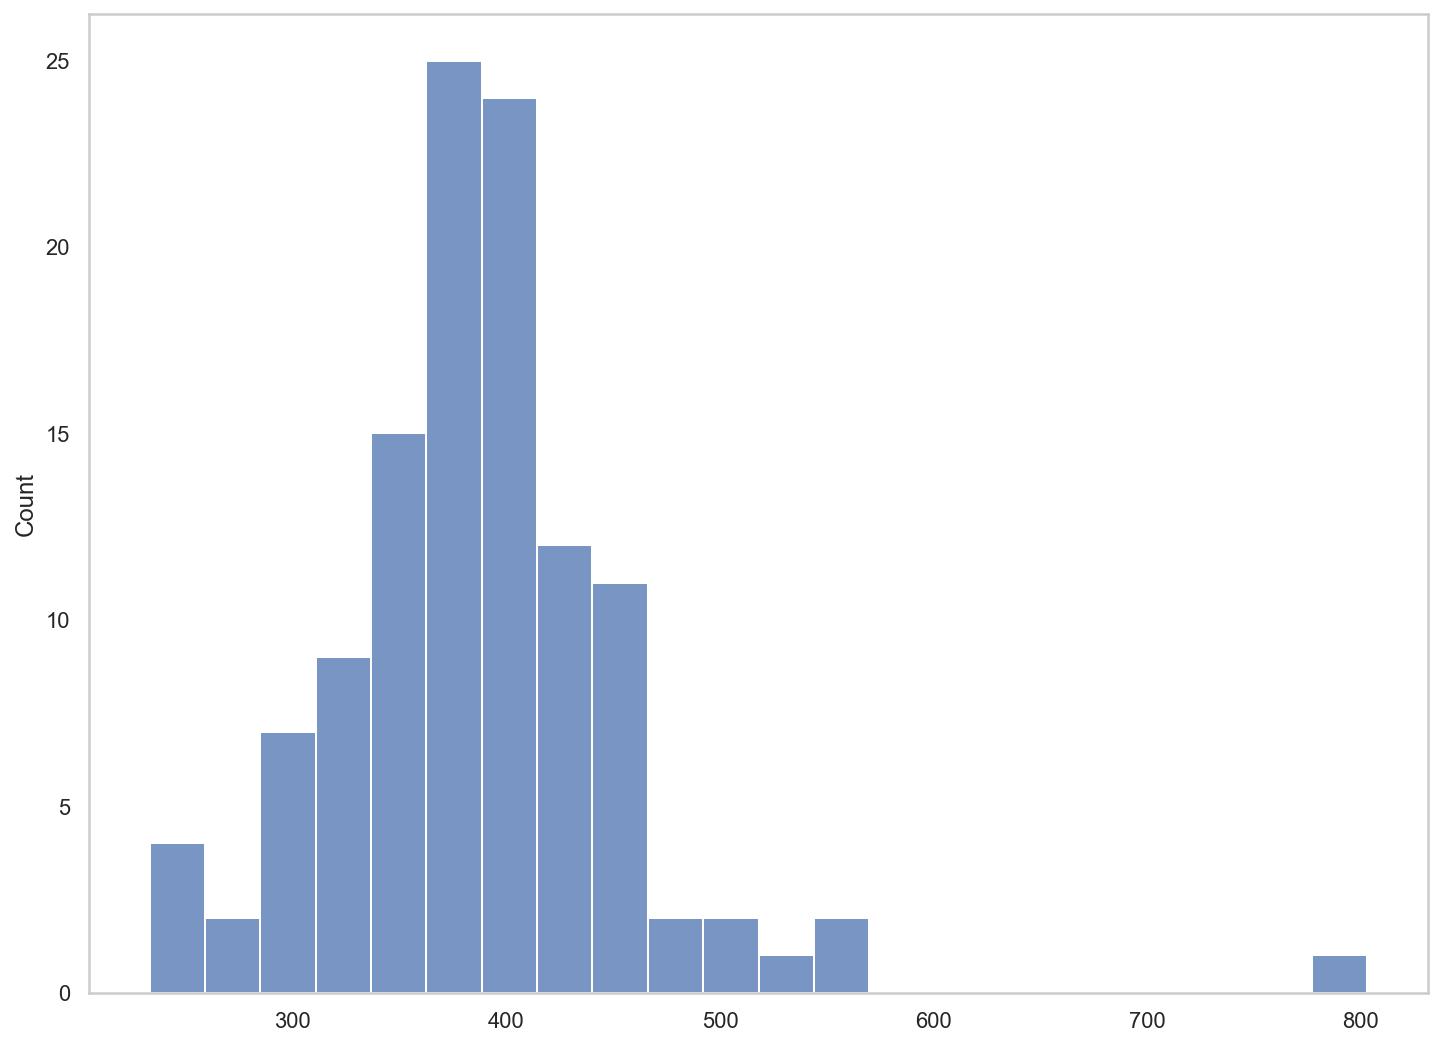

In [21]:
fs = 1000 # this is the sampling rate of the data, in HZ

# load the visual cortical ECOG channel, and the event indicces
data = io.loadmat('data/ecog_data.mat', squeeze_me=True)
tar = data['tar']
resp = data['resp']

conversion_factor = (1/fs)*1000 # convert from time points to ms
rt = (resp-tar) * conversion_factor # get the rt

print(('average response time = ' + str(np.mean(rt))))

sns.histplot(rt)
plt.show()


## Correlating reaction time with white noise

In the cell below, we'll see how well RT correlates with random Gaussian / white noise.

As expected, they only show a significant (p<=0.05) corellation ~5% of the time.

median p-value = 0.49249527688340783
percent of significant p-values = 5.800000000000001


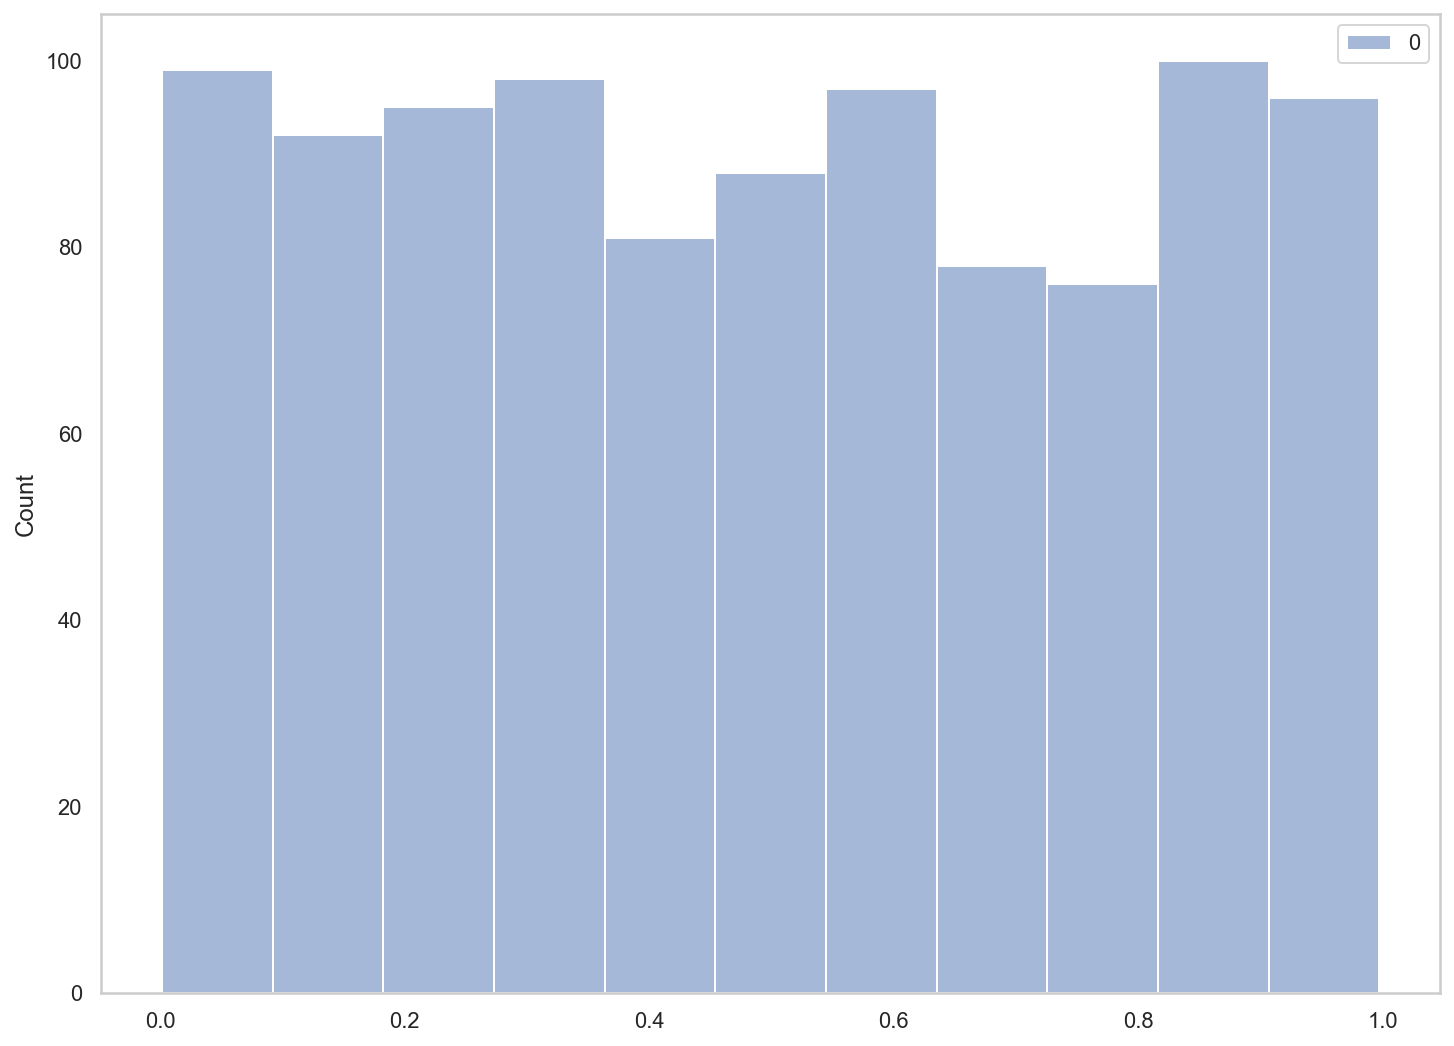

In [31]:
surrogates = 1000

r_surr = np.zeros((surrogates, 1))
p_surr = np.zeros((surrogates, 1))

for i in range(surrogates):
    data = np.random.normal(0, 1, size=rt.size)
    r_surr[i], p_surr[i] = pearsonr(data, rt)

print(('median p-value = ' + str(np.median(p_surr))))
print(('percent of significant p-values = ' + str((np.count_nonzero(p_surr<=0.05)/surrogates)*100)))

sns.histplot(p_surr)
plt.show()


## Correlating reaction time with autocorrelated noise

Now, we'll do the exact same thing, but we're going to integrate the white noise. This induces a false dependence between successive data points (and is known as Brown noise).

Perhaps unintuitively, fully ~50% of the time RT is significantly correlated to random Brown noise!

median p-value = 0.05310871907003229
percent of significant p-values = 48.5


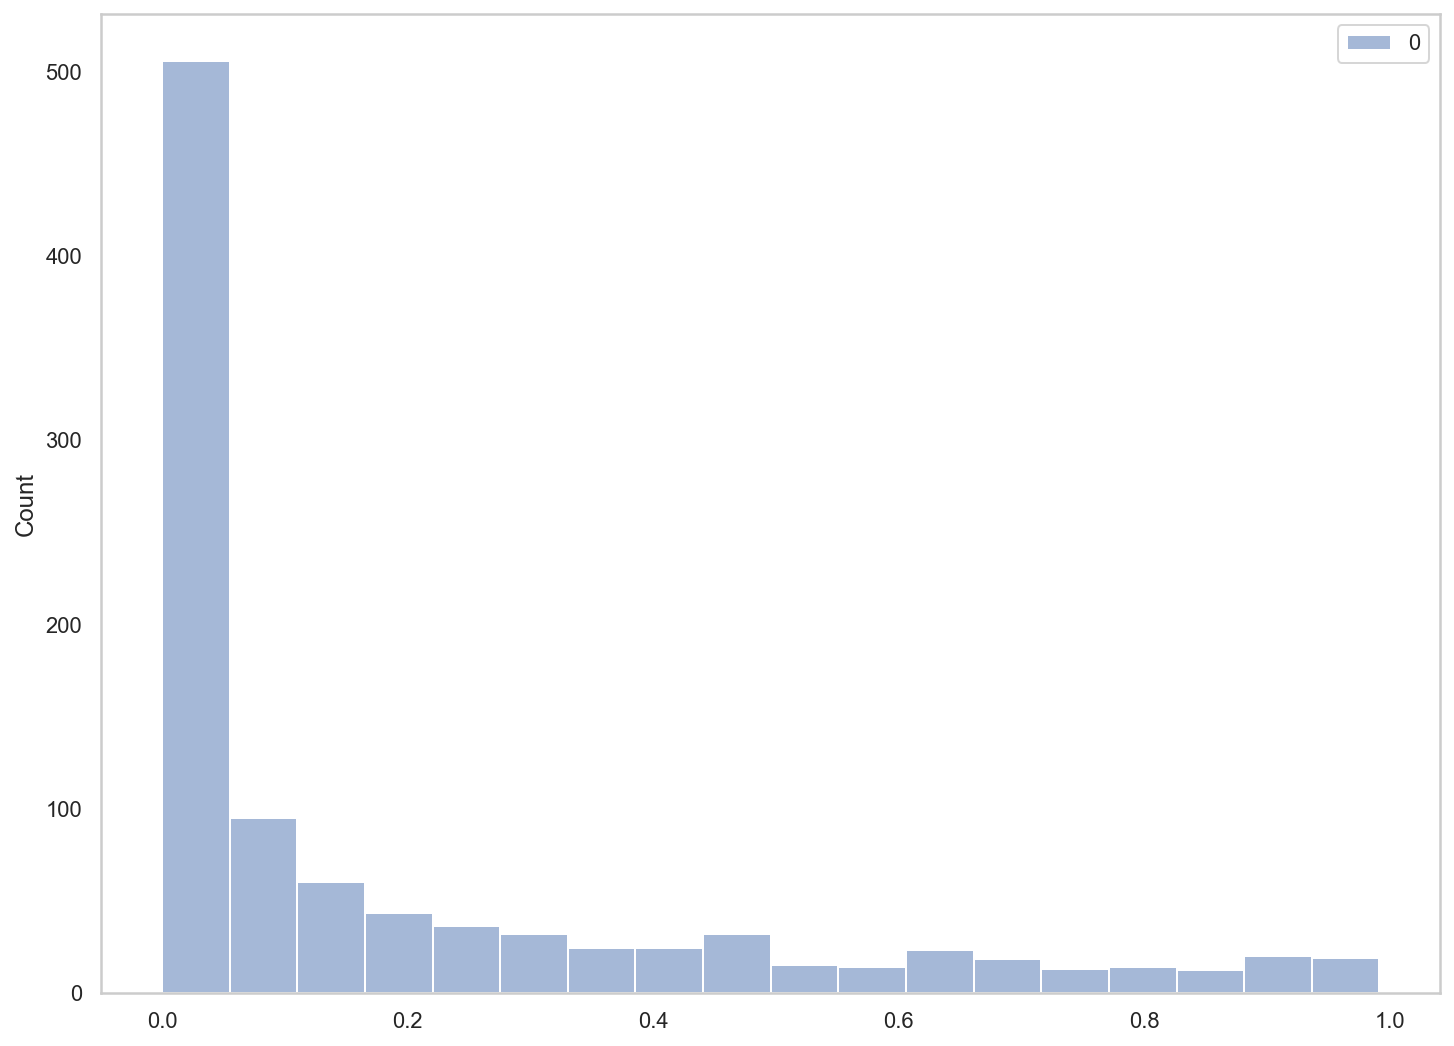

In [32]:
surrogates = 1000

r_surr = np.zeros((surrogates, 1))
p_surr = np.zeros((surrogates, 1))

for i in range(surrogates):
    data = np.random.normal(0, 1, size=rt.size)
    data = np.cumsum(data)
    r_surr[i], p_surr[i] = pearsonr(data, rt)

print(('median p-value = ' + str(np.median(p_surr))))
print(('percent of significant p-values = ' + str((np.count_nonzero(p_surr<=0.05)/surrogates)*100)))

sns.histplot(p_surr)
plt.show()
